In [1]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
# Importing matplotlib and seaborn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
# Importing all datasets
df = pd.read_csv("telecom_churn_data.csv")
pd.set_option('display.max_columns', None)


df.head(70)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
df.shape

(99999, 226)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
len(df.describe().columns)# 214 numeric columns

214

In [7]:
len(df.select_dtypes(include=['object']).columns) # 12 categorical

12

## Missing data

In [8]:
df.isna().sum().sort_values(ascending=False).head(20) ## features with missing data from high to low 

count_rech_2g_6             74846
date_of_last_rech_data_6    74846
count_rech_3g_6             74846
av_rech_amt_data_6          74846
max_rech_data_6             74846
total_rech_data_6           74846
arpu_3g_6                   74846
arpu_2g_6                   74846
night_pck_user_6            74846
fb_user_6                   74846
arpu_3g_7                   74428
count_rech_2g_7             74428
fb_user_7                   74428
count_rech_3g_7             74428
arpu_2g_7                   74428
av_rech_amt_data_7          74428
max_rech_data_7             74428
night_pck_user_7            74428
total_rech_data_7           74428
date_of_last_rech_data_7    74428
dtype: int64

In [9]:
len(df) # length of data is 99999 records

99999

In [10]:
x = len(df)/2 # taking 1/2 value
x

49999.5

In [11]:
df.columns[df.isnull().sum() > x] # column whose more than 50% value is null

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [12]:
df[df['date_of_last_rech_data_6'].isna()]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.00,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0

In [13]:
df['av_rech_amt_data_7'].value_counts()

154.0     3686
252.0     1869
198.0     1165
25.0       825
50.0       801
          ... 
591.0        1
792.0        1
1411.0       1
117.5        1
2320.0       1
Name: av_rech_amt_data_7, Length: 961, dtype: int64

In [14]:
df[df['date_of_last_rech_data_6'].isna()][['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6','arpu_2g_6','count_rech_3g_6','av_rech_amt_data_6']]## all values are null means there is no recharge done 

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,arpu_2g_6,count_rech_3g_6,av_rech_amt_data_6
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
99991,NaN,NaN,NaN,NaN,NaN,NaN
99992,NaN,NaN,NaN,NaN,NaN,NaN
99993,NaN,NaN,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#these can be imputed by zero later as they no data 

In [16]:
# can drop mobile_number,circle_id?


## Check numerical missing data

In [17]:
## NA values in columns like loc_og_t2o_mou,std_og_t2o_mou, are actually zero which means no such calls are there 
#hence we will fill with zero

In [18]:
x

49999.5

In [19]:
_95_perct_null=((x*95)/100)

In [20]:
_95_perct_null

47499.525

In [21]:
df[df.isnull().sum(axis=1) > (_95_perct_null)]


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


In [22]:
num_cols=df.describe().columns


In [23]:
for col in num_cols:
    if df[col].isnull().sum()>0:
        print("----Null ----")
        print(col,df[col].isnull().sum())
        print("---Value counts---")
        print(df[col].value_counts(),'\n')


----Null ----
loc_og_t2o_mou 1018
---Value counts---
0.0    98981
Name: loc_og_t2o_mou, dtype: int64 

----Null ----
std_og_t2o_mou 1018
---Value counts---
0.0    98981
Name: std_og_t2o_mou, dtype: int64 

----Null ----
loc_ic_t2o_mou 1018
---Value counts---
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64 

----Null ----
onnet_mou_6 3937
---Value counts---
0.00      8928
0.33        80
0.26        76
0.48        75
0.31        72
          ... 
91.43        1
818.31       1
195.71       1
237.73       1
730.43       1
Name: onnet_mou_6, Length: 24313, dtype: int64 

----Null ----
onnet_mou_7 3859
---Value counts---
0.00       9291
1.01         82
0.03         77
0.48         72
0.18         67
           ... 
203.89        1
298.11        1
601.29        1
297.89        1
1626.66       1
Name: onnet_mou_7, Length: 24336, dtype: int64 

----Null ----
onnet_mou_8 5378
---Value counts---
0.00      9419
0.38        87
1.01        83
0.41        77
0.36        74
          ... 
476.79      

std_og_mou_6 3937
---Value counts---
0.00       29413
0.58          89
0.48          89
0.31          89
0.53          88
           ...  
58.60          1
425.96         1
1470.21        1
487.88         1
373.91         1
Name: std_og_mou_6, Length: 27502, dtype: int64 

----Null ----
std_og_mou_7 3859
---Value counts---
0.00      30566
0.31        103
0.33         97
0.28         87
0.38         87
          ...  
78.24         1
512.19        1
138.58        1
809.23        1
108.88        1
Name: std_og_mou_7, Length: 27951, dtype: int64 

----Null ----
std_og_mou_8 5378
---Value counts---
0.00       30381
1.01          94
0.25          91
0.23          90
0.43          89
           ...  
1189.06        1
1101.16        1
492.81         1
776.31         1
250.71         1
Name: std_og_mou_8, Length: 27491, dtype: int64 

----Null ----
std_og_mou_9 7745
---Value counts---
0.00       31207
0.31          95
0.38          95
0.28          92
0.45          89
           ...  
1626.81 

----Null ----
isd_ic_mou_9 7745
---Value counts---
0.00      76854
0.01        297
0.46        134
0.03        121
0.05        106
          ...  
82.73         1
30.26         1
101.59        1
10.34         1
56.43         1
Name: isd_ic_mou_9, Length: 5557, dtype: int64 

----Null ----
ic_others_6 3937
---Value counts---
0.00       73919
0.06         798
0.48         759
0.05         718
0.08         691
           ...  
1065.61        1
20.83          1
215.03         1
19.00          1
7.90           1
Name: ic_others_6, Length: 1817, dtype: int64 

----Null ----
ic_others_7 3859
---Value counts---
0.00      76848
0.05        418
0.06        413
0.10        406
0.46        357
          ...  
222.61        1
163.33        1
82.06         1
106.91        1
23.81         1
Name: ic_others_7, Length: 2002, dtype: int64 

----Null ----
ic_others_8 5378
---Value counts---
0.00     72892
0.10       831
0.06       771
0.08       676
0.13       486
         ...  
41.70        1
94.18     

----Null ----
fb_user_7 74428
---Value counts---
1.0    23238
0.0     2333
Name: fb_user_7, dtype: int64 

----Null ----
fb_user_8 73660
---Value counts---
1.0    23463
0.0     2876
Name: fb_user_8, dtype: int64 

----Null ----
fb_user_9 74077
---Value counts---
1.0    22318
0.0     3604
Name: fb_user_9, dtype: int64 



In [24]:
date_col=cols=df.filter(regex=("last_date.*")).columns


In [25]:
date_col # can drop these dates columns no useful  information

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9'],
      dtype='object')

In [26]:
# dropping last_date_of_month_6,7,8,9 it doesnt have any useful information

In [27]:
df.drop(date_col,axis=1,inplace=True)

In [28]:
unique_col = df.nunique() == 1 ## columns with 1 unqiue value 

In [29]:
unique_col

mobile_number     False
circle_id          True
loc_og_t2o_mou     True
std_og_t2o_mou     True
loc_ic_t2o_mou     True
                  ...  
aon               False
aug_vbc_3g        False
jul_vbc_3g        False
jun_vbc_3g        False
sep_vbc_3g        False
Length: 222, dtype: bool

In [30]:
cols_to_drop= unique_col[unique_col.values == 1].index

In [31]:
df.circle_id.value_counts()

109    99999
Name: circle_id, dtype: int64

In [32]:
##loc_og_t2o_mou ,std_og_t2o_mou ,loc_ic_t2o_mou have all values as zero , we can drop this column no information

In [33]:
df.drop( cols_to_drop,axis=1,inplace=True)

In [34]:
df['night_pck_user_8'].value_counts() #These are yes or no if a user uses night pck or not

0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64

In [35]:
df['fb_user_6'].value_counts() ## similarlt these are if user use fb or not  

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

In [36]:
## for these yes no fields we will replace with mode 

In [37]:
cols=df.filter(regex=("night.*|fb_.*")).columns


In [38]:
df[cols] = df[cols].fillna(df[cols].mode().iloc[0])

In [39]:
df['night_pck_user_8'].value_counts()

0.0    99450
1.0      549
Name: night_pck_user_8, dtype: int64

In [40]:
numeric_null_cols=df.describe().columns


In [41]:
numeric_null_cols=[x for x in numeric_null_cols if x not in cols] # take rest of numeric col without these ones treated above


In [42]:
numeric_null_cols # These we will replace by 0 for nan values

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

In [43]:
df[numeric_null_cols] = df[numeric_null_cols].fillna(0)

In [44]:
# dropping last_date_of_month_6,7,8,9 it doesnt have any useful information

In [45]:
df[df.isnull().sum(axis=1) > 2]


,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.0,47.64,108.68,120.94,18.04,0.00,0.0,0.0,0.0,46.56,236.84,96.84,42.08,0.45,0.0,0.0,0.00,155.33,412.94,285.46,124.94,115.69,71.11,67.46,148.23,14.38,15.44,38.89,38.98,99.48,122.29,49.63,158.19,229.56,208.86,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,167.09,118.18,21.73,58.34,43.23,3.86,139.33,306.66,239.03,171.49,370.04,519.53,395.03,517.74,0.21,0.00,0.00,0.45,0.00,0.85,0.0,0.01,0.93,3.14,0.00,0.36,5,4,2,7,168,315,116,358,86,200,86,100,6/17/2014,7/24/2014,8/14/2014,9/29/2014,0,200,86,0,NaN,NaN,NaN,9/17/2014,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0

In [46]:
#date_col=df.select_dtypes(include=['object']).columns # 12 date type columns

In [47]:
# we will convert to datetime type and extract only day , month and year are obvious

In [48]:
date_col=cols=df.filter(regex=("date.*")).columns


In [49]:
date_col

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')

In [50]:
df[date_col]=df[date_col].apply(lambda x:pd.to_datetime(x,format="%m/%d/%Y"))

In [51]:
df[date_col]

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,2014-06-21,2014-07-16,2014-08-08,NaT
1,2014-06-29,2014-07-31,2014-08-28,2014-09-30,NaT,2014-07-25,2014-08-10,NaT
2,2014-06-17,2014-07-24,2014-08-14,2014-09-29,NaT,NaT,NaT,2014-09-17
3,2014-06-28,2014-07-31,2014-08-31,2014-09-30,NaT,NaT,NaT,NaT
4,2014-06-26,2014-07-28,2014-08-09,2014-09-28,2014-06-04,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...
99994,2014-06-03,2014-07-20,2014-08-26,2014-09-25,NaT,NaT,NaT,NaT
99995,2014-06-17,2014-07-17,2014-08-24,2014-09-26,NaT,NaT,NaT,NaT
99996,2014-06-13,2014-07-26,NaT,2014-09-02,2014-06-13,NaT,NaT,NaT
99997,2014-06-17,2014-07-19,2014-08-20,2014-09-17,2014-06-17,2014-07-19,2014-08-20,2014-09-17


In [52]:
df[date_col]=df[date_col].apply(lambda x:  x.dt.day) ## store the day


In [53]:
df[date_col]

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,21.0,16.0,8.0,28.0,21.0,16.0,8.0,NaN
1,29.0,31.0,28.0,30.0,NaN,25.0,10.0,NaN
2,17.0,24.0,14.0,29.0,NaN,NaN,NaN,17.0
3,28.0,31.0,31.0,30.0,NaN,NaN,NaN,NaN
4,26.0,28.0,9.0,28.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
99994,3.0,20.0,26.0,25.0,NaN,NaN,NaN,NaN
99995,17.0,17.0,24.0,26.0,NaN,NaN,NaN,NaN
99996,13.0,26.0,NaN,2.0,13.0,NaN,NaN,NaN
99997,17.0,19.0,20.0,17.0,17.0,19.0,20.0,17.0


In [54]:
## the missing value could be that person has not recharged
# The day recharged is not important , but if the person has recharged or not we could  use that information 

In [55]:
df[date_col]=df[date_col].fillna(0)

In [56]:
df['night_pck_user_6'].value_counts() ## these are just 0 and 1

0.0    99368
1.0      631
Name: night_pck_user_6, dtype: int64

In [57]:
df['fb_user_6'].value_counts() # similar 0 and 1  

1.0    97846
0.0     2153
Name: fb_user_6, dtype: int64

In [58]:
df['monthly_2g_6'].value_counts()

0    92674
1     6728
2      562
3       28
4        7
Name: monthly_2g_6, dtype: int64

In [59]:
df['sachet_3g_6'].value_counts()

0     95818
1      2990
2       607
3       216
4       108
5        65
6        45
7        45
9        24
8        20
11       12
10       12
15        5
12        4
14        4
19        4
13        3
18        3
22        3
23        3
16        2
17        2
29        2
28        1
21        1
Name: sachet_3g_6, dtype: int64

In [60]:
df['night_pck_user_6'].value_counts()

0.0    99368
1.0      631
Name: night_pck_user_6, dtype: int64

In [61]:
df

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,21.0,16.0,8.0,28.0,252,252,252,0,21.0,16.0,8.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00,0.0,0.0,0.0,0.0,0

In [62]:
num_cols=df.describe()

In [63]:
# Derive new feature

In [64]:
df['total_data_rech_amt_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_data_rech_amt_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']
df['total_data_rech_amt_8'] = df['total_rech_data_8'] * df['av_rech_amt_data_8']
df['total_data_rech_amt_9'] = df['total_rech_data_9'] * df['av_rech_amt_data_9']

In [65]:
df['avg_recharge_6_7']=df[['total_data_rech_amt_6','total_rech_amt_6','total_data_rech_amt_7','total_rech_amt_7']].mean(axis=1)

In [66]:
df['avg_recharge_6_7']

0        279.50
1        153.00
2        120.75
3        135.00
4        150.50
          ...  
99994     42.50
99995     55.00
99996     49.25
99997    801.00
99998    216.00
Name: avg_recharge_6_7, Length: 99999, dtype: float64

In [67]:
perctile_value = np.percentile(df['avg_recharge_6_7'], 70)


In [68]:
perctile_value

239.0

In [69]:
## Filter high value customers

In [70]:
df=df[df['avg_recharge_6_7'] >= perctile_value]

In [71]:
df.shape

(30001, 215)

In [72]:
df.drop('avg_recharge_6_7',axis=1,inplace=True)

In [73]:
## find the Churn and not Churn ones 

In [74]:
df['Churn']=0

In [75]:
df.loc[(df['total_ic_mou_9'] ==0 )& (df['total_og_mou_9'] == 0 )& (df['vol_2g_mb_9'] == 0) & (df['vol_3g_mb_9'] == 0),'Churn']=1

In [76]:
df['Churn'].value_counts()


0    27560
1     2441
Name: Churn, dtype: int64

In [77]:
## dont need month 9 data as its used for finding Churn /response var

In [78]:
df.drop(df.filter(regex=("_9$")).columns,axis=1,inplace =True)

In [79]:
df.drop('sep_vbc_3g',axis=1,inplace=True)

In [80]:
df

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,Churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,21.0,16.0,8.0,252,252,252,21.0,16.0,8.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,27.0,25.0,26.0,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,802,57.74,19.38,18.7

In [81]:
## mobile number not needed
df.drop(['mobile_number'], axis=1, inplace = True)

# Data glimpse
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,Churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,21.0,16.0,8.0,252,252,252,21.0,16.0,8.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,27.0,25.0,26.0,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
8,378.721,492.223,137.362,413.

In [82]:
df[df['Churn'] == 0]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,Churn
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,25.0,31.0,30.0,50,0,10,0.0,31.0,23.0,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.00,0.00,19.83,0.00,0.00,0.00,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,1.0,1.0,1.0,315,21.03,910.65,122.16,0.0,354.0,207.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.00,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.0,0.0,0.0,763.29,934.69,938.79,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30.0,31.0,31.0,30,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,720,0.00,0.00,0.00,0.0,0.0,0.0,0
23,74.350,193.897,366.966,48.96,50.66,33.

## Outlier analysis


In [83]:
num_cols=df.describe()

In [84]:
len(num_cols.columns)

161

In [85]:
num_cols

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,Churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000

In [86]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,Churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000

In [87]:
df

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,Churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,21.0,16.0,8.0,252,252,252,21.0,16.0,8.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,27.0,25.0,26.0,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
8,378.721,492.223,13

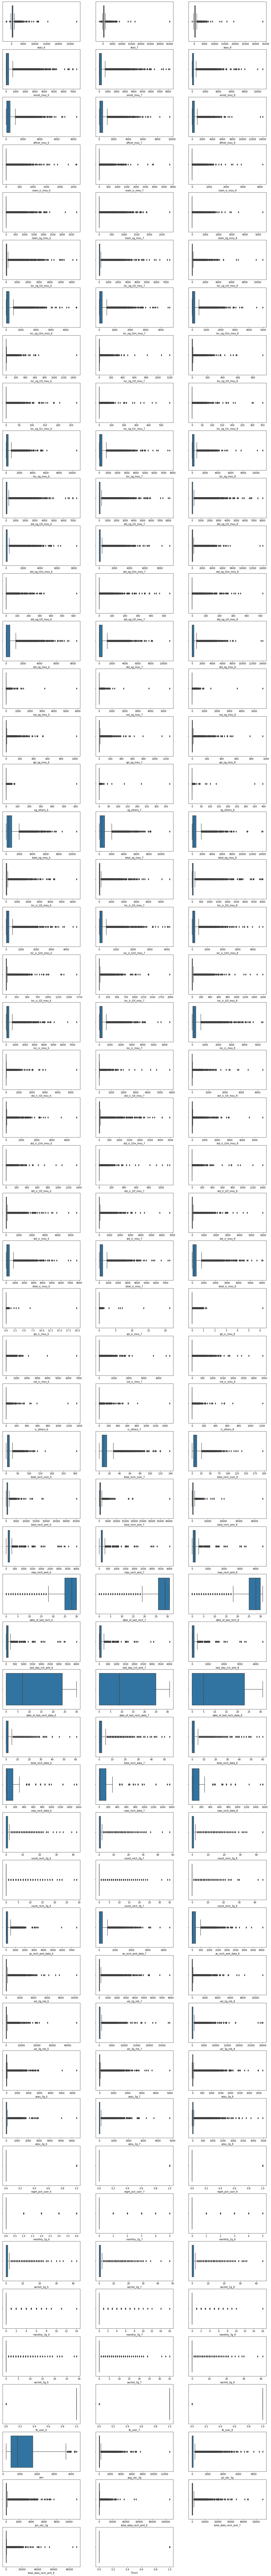

In [88]:
plt.figure(figsize=(20,200))
plt.tight_layout()

# Title names for the columns in the dataset


# Visualising the outliers with boxplot for all the variables 
for i in enumerate(num_cols):
    plt.subplot(54,3,i[0]+1)
    sns.boxplot(x=df[i[1]],data=df)  # using boxplot
        

In [89]:
df['og_others_6'].value_counts()

0.00     23151
0.21       151
0.43        67
0.86        53
0.20        52
         ...  
12.44        1
11.99        1
15.61        1
9.99         1
15.89        1
Name: og_others_6, Length: 841, dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 161 entries, arpu_6 to Churn
dtypes: float64(135), int64(26)
memory usage: 37.1 MB


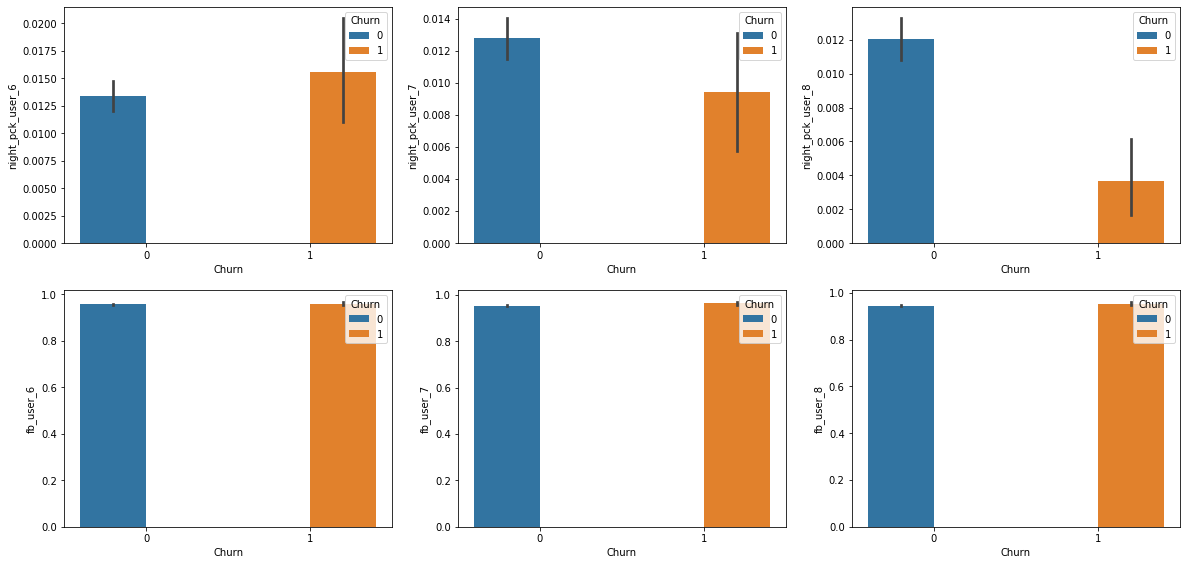

In [91]:
# Univariate Plot Analysis of  categorical variables vs Churn
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

plt.figure(figsize = (20, 20))
plt.tight_layout()


# Visualising the outliers with boxplot for all the variables 
for i in enumerate(category_list):
    plt.subplot(4,3,i[0]+1)
    sns.barplot(x = 'Churn', y = df[i[1]], hue = "Churn", data = df)


plt.show()

In [92]:
df['night_pck_user_8'].value_counts()

0.0    29660
1.0      341
Name: night_pck_user_8, dtype: int64

In [93]:
## night_pck_user_8 is less in Churned , indicating person is Churning

## Bi variate analysis

In [94]:
num_cols=df.describe()

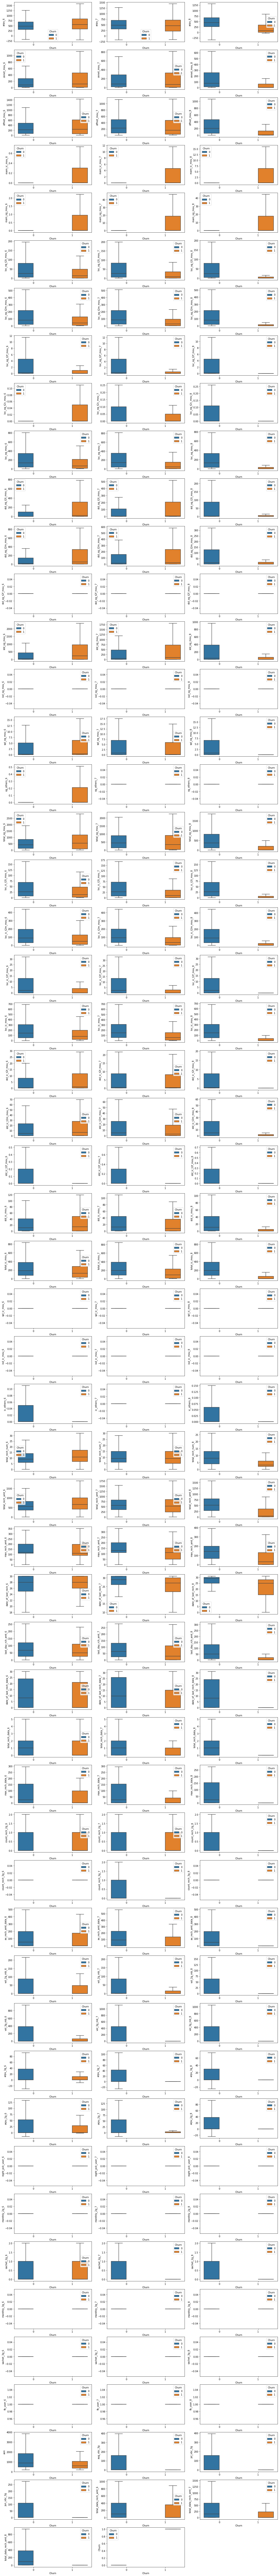

In [95]:
plt.figure(figsize=(20,200))
plt.tight_layout()

# Title names for the columns in the dataset


# Visualising the outliers with boxplot for all the variables 
for i in enumerate(num_cols):
    plt.subplot(54,3,i[0]+1)
    sns.boxplot(x = 'Churn', y = df[i[1]], hue = "Churn", data = df,showfliers=False)

## Correlation Matrix

In [96]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [97]:
corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

In [98]:
pd.set_option('display.max_rows', None)


In [99]:
sol[sol.values > 0.70]

count_rech_2g_8     sachet_2g_8              0.987161
count_rech_2g_7     sachet_2g_7              0.986408
count_rech_2g_6     sachet_2g_6              0.984924
arpu_8              total_rech_amt_8         0.955351
arpu_6              total_rech_amt_6         0.946125
arpu_7              total_rech_amt_7         0.943588
isd_og_mou_7        isd_og_mou_8             0.943120
arpu_3g_6           arpu_2g_6                0.940079
arpu_3g_8           arpu_2g_8                0.937701
arpu_3g_7           arpu_2g_7                0.936447
isd_og_mou_6        isd_og_mou_8             0.918187
                    isd_og_mou_7             0.915247
total_rech_data_6   count_rech_2g_6          0.911384
total_rech_data_7   count_rech_2g_7          0.910279
total_rech_data_8   count_rech_2g_8          0.906664
total_rech_data_7   sachet_2g_7              0.904243
total_rech_data_6   sachet_2g_6              0.903875
total_rech_data_8   sachet_2g_8              0.900629
loc_ic_mou_6        total_ic

In [100]:
## count_rech_2g_7  -   sachet_2g_7  are highly  correlated across 6,7,8 months
## arpu_8           -   total_rech_amt_8 are highly correlate across 6,7,8 months
# total_rech_data_6  - count_rech_2g_6  are highly coorelated across 3 months

## total_rech_data_6   -sachet_2g_6 are highly correlated across 6,7,8 months
##  arpu_3g_8         -  arpu_2g_8  are highly correlated across all months
#  loc_ic_mou_6     =   total_ic_mou_6  arr highly correlated across all months


#Our conclusion is there are many correlated features which need to be dropped , PCA should help in reduction of multicollinearity


In [101]:
df.drop(df.filter(regex=("sachet_2g.*")).columns,axis=1,inplace =True)

In [102]:
df.drop(df.filter(regex=("total_rech_amt.*")).columns,axis=1,inplace =True)

In [103]:
df.drop(df.filter(regex=("count_rech_2g.*")).columns,axis=1,inplace =True)

In [104]:
df.drop(df.filter(regex=("loc_ic_mou_.*")).columns,axis=1,inplace =True)

In [105]:
# Let's see the correlation matrix 


#plt.figure(figsize = (20,10))        # Size of the figure too large  above 
#sns.heatmap(df.corr(),annot = True)

### Checking the Churn Rate

In [106]:
Churn = (sum(df['Churn'])/len(df['Churn'].index))*100
Churn

8.136395453484884

In [107]:
# the data is imbalanced with very few Churned 

In [108]:
## Train Test Split

In [109]:
X = df.drop(['Churn'],axis=1)
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,21.0,16.0,8.0,252,252,252,21.0,16.0,8.0,1.0,1.0,1.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,27.0,25.0,26.0,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,802,57.74,19.38,18.74,0.0,0.0,0.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.

In [110]:
y = df.Churn

In [111]:
y.shape

(30001,)

In [112]:
X.shape

(30001, 148)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

In [114]:
X_train.shape

(21000, 148)

In [115]:
y_train.shape

(21000,)

## Feature Scaling

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
num_cols=X_train.describe().columns

In [118]:
num_cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'total_data_rech_amt_6',
       'total_data_rech_amt_7', 'total_data_rech_amt_8'],
      dtype='object', length=148)

In [119]:
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8
39186,1.115484,0.688737,0.152667,-0.557530,-0.541565,-0.498528,-0.461376,-0.438796,-0.489079,0.166015,0.177751,0.252122,-0.178395,-0.062395,-0.095051,-0.347750,-0.323913,-0.316741,-0.562058,-0.545416,-0.560932,-0.227853,-0.290731,-0.304296,-0.254831,0.482122,-0.077536,-0.596067,-0.576507,-0.573805,-0.411127,-0.413976,-0.373254,-0.433396,-0.407680,-0.350559,-0.156374,-0.141659,-0.143638,-0.567225,-0.550501,-0.480652,2.238915,1.762919,0.997135,-0.326117,0.065368,-0.272720,-0.140957,-0.01516,-0.016828,-0.665728,-0.661873,-0.650555,-0.305558,-0.187825,-0.102345,-0.080491,-0.054874,-0.190812,-0.177672,-0.127684,-0.279557,-0.184858,-0.179917,-0.191835,-0.117328,0.019944,0.279901,-0.135600,-0.136123,-0.124243,-0.207719,-0.107215,0.092803,0.378162,0.154991,-0.037517,-0.308577,-0.13577,-0.234992,3.273325,1.628862,0.689833,-0.074812,0.027293,-0.088662,-0.415802,-0.717597,-0.751786,1.293454,1.573734,0.391372,-0.697635,-1.073858,0.443044,2.047579,-0.456642,0.716280,-0.956754,-0.982414,-0.908515,-0.587543,-0.598072,-0.541753,-0.694135,-0.700252,-0.656217,-0.367574,-0.356341,-0.324914,-0.664112,-0.670667,-0.623153,-0.388365,-0.375952,-0.337356,-0.364613,-0.394511,-0.373871,-0.378436,-0.371852,-0.366982,-0.400634,-0.386089,-0.381471,-0.119364,-0.116668,-0.107747,-0.401189,-0.408175,-0.376513,-0.360796,-0.34396,-0.343262,-0.211037,-0.207517,-0.184095,0.206015,0.215988,0.23825,2.582178,-0.401980,-0.400504,-0.382233,-0.364843,-0.356511,-0.275102
39833,-0.096775,-0.500253,-0.275833,-0.252141,-0.454845,-0.420576,-0.109409,-0.302716,-0.143763,-0.211944,-0.168046,-0.169673,-0.232413,-0.211540,-0.192132,-0.090037,-0.228832,-0.162589,0.442672,0.066070,0.255949,0.253079,-0.057653,1.482865,-0.254831,1.558365,-0.224949,0.255810,-0.108254,0.138304,-0.209983,-0.368013,-0.373254,-0.361800,-0.387

### Logistic Regression

In [120]:
import statsmodels.api as sm

In [121]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20854
Model Family:                Binomial   Df Model:                          145
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 24 May 2021   Deviance:                          nan
Time:                        11:38:56   Pearson chi2:                 8.25e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -8.509e+14   4.63e+05  -1.84e+09      0.000   -8.51e+14   -8.51e+14
arpu_6                    1.418e+14   1.38e+06   1.03e+08      0.000    1.42e+14    1.42e+14
arpu_7                    8.729e+13   1.51e+06   5.77e+07      0.000    8.73e+13    8.73e+13
arpu_8                   -9.126e+13   1.42e+06  -6.42e+07      0.000   -9.13e+13   -9.13e+13
onnet_mou_6               1.294e+15   4.06e+07   3.19e+07      0.000    1.29e+15    1.29e+15
onnet_mou_7              -8.775e+14   3.29e+07  -2.66e+07      0.000   -8.77e+14   -8.77e+14
onnet_mou_8              -1.763e+15   3.51e+07  -5.02e+07      0.000   -1.76e+15   -1.76e+15
offnet_mou_6              1.148e+15   4.22e+07   2.72e+07      0.000    1.15e+15    1.15e+15
offnet_mou_7             -9.096e+14   3.28e+07  -2.77e+07      0.000    -9.1e+14    -9.1e+14
offnet_mou_8             -1.862e+15    3.6e+07  -5.18e+07      0.000   -1.86e+15   -1.86e+15
roam_ic_mou_6             3.881e+13   7.03e+05   5.52e+07      0.000    3.88e+13    3.88e+13
roam_ic_mou_7             4.557e+13   7.56e+05   6.03e+07      0.000    4.56e+13    4.56e+13
roam_ic_mou_8            -4.603e+13   6.96e+05  -6.62e+07      0.000    -4.6e+13    -4.6e+13
roam_og_mou_6            -2.758e+14      1e+07  -2.75e+07      0.000   -2.76e+14   -2.76e+14
roam_og_mou_7             2.369e+14   6.41e+06    3.7e+07      0.000    2.37e+14    2.37e+14
roam_og_mou_8             3.681e+14   7.65e+06   4.81e+07      0.000    3.68e+14    3.68e+14
loc_og_t2t_mou_6         -1.197e+18   1.88e+10  -6.35e+07      0.000    -1.2e+18    -1.2e+18
loc_og_t2t_mou_7         -1.857e+18   2.01e+10  -9.25e+07      0.000   -1.86e+18   -1.86e+18
loc_og_t2t_mou_8          1.963e+18   1.94e+10   1.01e+08      0.000    1.96e+18    1.96e+18
loc_og_t2m_mou_6          -1.33e+18   2.09e+10  -6.35e+07      0.000   -1.33e+18   -1.33e+18
loc_og_t2m_mou_7         -1.855e+18   2.01e+10  -9.25e+07      0.000   -1.85e+18   -1.85e+18
loc_og_t2m_mou_8           1.98e+18   1.96e+10   1.01e+08      0.000    1.98e+18    1.98e+18
loc_og_t2f_mou_6          -1.19e+17   1.87e+09  -6.36e+07      0.000   -1.19e+17   -1.19e+17
loc_og_t2f_mou_7         -1.692e+17   1.83e+09  -9.25e+07      0.000   -1.69e+17   -1.69e+17
loc_og_t2f_mou_8          1.631e+17   1.61e+09   1.01e+08      0.000    1.63e+17    1.63e+17
loc_og_t2c_mou_6          -3.06e+13   5.81e+05  -5.27e+07      0.000   -3.06e+13   -3.06e+13
loc_og_t2c_mou_7         -1.022e+13   6.88e+05  -1.48e+07      0.000   -1.02e+13   -1.02e+13
loc_og_t2c_mou_8          4.688e+12   6.36e+05   7.37e+06      0.000    4.69e+12    4.69e+12
loc_og_mou_6             -2.121e+17   3.93e+10   -5.4e+06      0.000   -2.12e+17   -2.12e+17
loc_og_mou_7              1.234e+18   4.09e+10   3.02e+07      0.000    1.23e+18    1.23e+18
loc_og_mou_8  

## RFE selection

In [122]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X,y)
#print(rfe.support_)           # Printing the boolean results
#print(rfe.ranking_)           # Printing the ranking

In [123]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [124]:
X_train = X_train_rfe[X_train_rfe.columns]


In [125]:
X_test =  X_test[X_train.columns]

In [126]:
X_train.head()

,loc_og_t2f_mou_8,std_og_t2f_mou_8,spl_og_mou_8,og_others_7,std_ic_t2m_mou_8,total_ic_mou_8,isd_ic_mou_8,total_rech_num_8,date_of_last_rech_8,last_day_rch_amt_8,date_of_last_rech_data_8,total_rech_data_8,av_rech_amt_data_8,arpu_2g_8,sachet_3g_6
39186,-0.304296,-0.143638,-0.272720,-0.01516,0.279901,-0.037517,0.689833,-0.751786,0.443044,0.716280,-0.908515,-0.541753,-0.623153,-0.381471,-0.211037
39833,1.482865,-0.143638,-0.327945,-0.01516,-0.053103,0.110767,-0.072660,-0.536167,0.755046,0.247088,0.516535,-0.209098,-0.125000,-0.381406,-0.211037
38778,-0.304296,-0.143638,-0.327945,-0.01516,0.087536,0.041191,0.045676,0.002880,-0.492964,-0.423186,-0.908515,-0.541753,-0.623153,-0.381471,-0.211037
43026,0.676728,2.375395,0.410555,-0.01516,-0.127387,3.354952,-0.159451,0.002880,0.443044,0.247088,-0.908515,-0.541753,-0.623153,-0.381471,-0.211037
12271,-0.119061,-0.143638,-0.252639,-0.01516,-0.263402,0.592781,-0.159451,-0.428357,0.755046,-0.423186,0.348882,-0.209098,0.159659,-0.381471,-0.211037


In [127]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train, y_train)
#logsk.fit(X_train, y_train)

LogisticRegression(C=1000000000.0)

In [128]:
#Comparing the model with StatsModels
#logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4128.2
Date:                Mon, 24 May 2021   Deviance:                       8256.4
Time:                        11:40:04   Pearson chi2:                 5.36e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.1782      0.076    -55.077      0.000      -4.327      -4.030
loc_og_t2f_mou_8            -0.1613      0.078     -2.061      0.039      -0.315      -0.008
std_og_t2f_mou_8            -0.2140      0.105     -2.031      0.042      -0.420      -0.008
spl_og_mou_8                -0.1834      0.063     -2.933      0.003      -0.306      -0.061
og_others_7                  0.0891      0.068      1.319      0.187      -0.043       0.221
std_ic_t2m_mou_8             0.6826      0.094      7.267      0.000       0.499       0.867
total_ic_mou_8              -2.8552      0.142    -20.099      0.000      -3.134      -2.577
isd_ic_mou_8                 0.5025      0.055      9.140      0.000       0.395       0.610
total_rech_num_8            -0.3643      0.052     -6.948      0.000      -0.467      -0.262
date_of_last_rech_8         -0.3129      0.024    -13.217      0.000      -0.359      -0.266
last_day_rch_amt_8          -0.5222      0.059     -8.829      0.000      -0.638      -0.406
date_of_last_rech_data_8    -0.5769      0.070     -8.251      0.000      -0.714      -0.440
total_rech_data_8           -0.0643      0.092     -0.698      0.485      -0.245       0.116
av_rech_amt_data_8          -0.8407      0.118     -7.101      0.000      -1.073      -0.609
arpu_2g_8                    0.4859      0.094      5.175      0.000       0.302       0.670
sachet_3g_6                  0.1076      0.028      3.819      0.000       0.052       0.163
============================================================================================
"""

In [129]:
def check_vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [130]:
 X_train.drop('total_rech_data_8', 1,inplace=True)

In [131]:
# Let's re-run the model using the selected variables


In [132]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4128.5
Date:                Mon, 24 May 2021   Deviance:                       8256.9
Time:                        11:40:04   Pearson chi2:                 5.18e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.1756      0.076    -55.159      0.000      -4.324      -4.027
loc_og_t2f_mou_8            -0.1615      0.078     -2.064      0.039      -0.315      -0.008
std_og_t2f_mou_8            -0.2142      0.105     -2.033      0.042      -0.421      -0.008
spl_og_mou_8                -0.1833      0.063     -2.931      0.003      -0.306      -0.061
og_others_7                  0.0889      0.067      1.318      0.187      -0.043       0.221
std_ic_t2m_mou_8             0.6835      0.094      7.294      0.000       0.500       0.867
total_ic_mou_8              -2.8527      0.142    -20.094      0.000      -3.131      -2.574
isd_ic_mou_8                 0.5021      0.055      9.134      0.000       0.394       0.610
total_rech_num_8            -0.3734      0.051     -7.306      0.000      -0.474      -0.273
date_of_last_rech_8         -0.3114      0.024    -13.203      0.000      -0.358      -0.265
last_day_rch_amt_8          -0.5184      0.059     -8.812      0.000      -0.634      -0.403
date_of_last_rech_data_8    -0.6026      0.060    -10.051      0.000      -0.720      -0.485
av_rech_amt_data_8          -0.8593      0.115     -7.481      0.000      -1.084      -0.634
arpu_2g_8                    0.4953      0.092      5.390      0.000       0.315       0.675
sachet_3g_6                  0.1017      0.027      3.829      0.000       0.050       0.154
============================================================================================
"""

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
check_vif(X_train)

,Features,VIF
11,av_rech_amt_data_8,4.83
12,arpu_2g_8,3.71
10,date_of_last_rech_data_8,1.75
5,total_ic_mou_8,1.35
7,total_rech_num_8,1.30
8,date_of_last_rech_8,1.28
4,std_ic_t2m_mou_8,1.19
9,last_day_rch_amt_8,1.13
0,loc_og_t2f_mou_8,1.08
6,isd_ic_mou_8,1.07


In [135]:
#count_rech_2g_8 and sachet_2g_8 are  correalted as per oour heatmap as well we can drop count_rech_2g_8

In [136]:
 X_train.drop('og_others_7', 1,inplace=True)

In [137]:
## Re run the model summary

In [138]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4134.1
Date:                Mon, 24 May 2021   Deviance:                       8268.2
Time:                        11:40:05   Pearson chi2:                 5.50e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.1734      0.076    -55.121      0.000      -4.322      -4.025
loc_og_t2f_mou_8            -0.1619      0.078     -2.076      0.038      -0.315      -0.009
std_og_t2f_mou_8            -0.1784      0.097     -1.841      0.066      -0.368       0.011
spl_og_mou_8                -0.1475      0.058     -2.523      0.012      -0.262      -0.033
std_ic_t2m_mou_8             0.6840      0.094      7.256      0.000       0.499       0.869
total_ic_mou_8              -2.8666      0.142    -20.173      0.000      -3.145      -2.588
isd_ic_mou_8                 0.5054      0.055      9.230      0.000       0.398       0.613
total_rech_num_8            -0.3796      0.051     -7.420      0.000      -0.480      -0.279
date_of_last_rech_8         -0.3104      0.024    -13.171      0.000      -0.357      -0.264
last_day_rch_amt_8          -0.5090      0.058     -8.721      0.000      -0.623      -0.395
date_of_last_rech_data_8    -0.6037      0.060    -10.068      0.000      -0.721      -0.486
av_rech_amt_data_8          -0.8591      0.115     -7.479      0.000      -1.084      -0.634
arpu_2g_8                    0.4936      0.092      5.370      0.000       0.313       0.674
sachet_3g_6                  0.1016      0.027      3.824      0.000       0.050       0.154
============================================================================================
"""

In [139]:
check_vif(X_train)

,Features,VIF
10,av_rech_amt_data_8,4.83
11,arpu_2g_8,3.71
9,date_of_last_rech_data_8,1.75
4,total_ic_mou_8,1.35
6,total_rech_num_8,1.30
7,date_of_last_rech_8,1.28
3,std_ic_t2m_mou_8,1.19
8,last_day_rch_amt_8,1.13
0,loc_og_t2f_mou_8,1.08
5,isd_ic_mou_8,1.07


In [140]:
# total_rech_data_8 and sachet_2g_8 were correlated from correlation matrix as well we will drop sachet_2g_8 

In [141]:
 X_train.drop('std_og_t2f_mou_8', 1,inplace=True)

In [142]:
X_train_sm=sm.add_constant(X_train)

In [143]:
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20987
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4136.6
Date:                Mon, 24 May 2021   Deviance:                       8273.3
Time:                        11:40:05   Pearson chi2:                 5.92e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.1710      0.076    -55.125      0.000      -4.319      -4.023
loc_og_t2f_mou_8            -0.1851      0.080     -2.322      0.020      -0.341      -0.029
spl_og_mou_8                -0.1480      0.058     -2.531      0.011      -0.263      -0.033
std_ic_t2m_mou_8             0.6777      0.096      7.068      0.000       0.490       0.866
total_ic_mou_8              -2.8839      0.142    -20.258      0.000      -3.163      -2.605
isd_ic_mou_8                 0.5080      0.055      9.233      0.000       0.400       0.616
total_rech_num_8            -0.3766      0.051     -7.374      0.000      -0.477      -0.276
date_of_last_rech_8         -0.3095      0.024    -13.145      0.000      -0.356      -0.263
last_day_rch_amt_8          -0.5152      0.058     -8.855      0.000      -0.629      -0.401
date_of_last_rech_data_8    -0.6033      0.060    -10.061      0.000      -0.721      -0.486
av_rech_amt_data_8          -0.8583      0.115     -7.466      0.000      -1.084      -0.633
arpu_2g_8                    0.4937      0.092      5.362      0.000       0.313       0.674
sachet_3g_6                  0.1020      0.027      3.841      0.000       0.050       0.154
============================================================================================
"""

### Making Predictions

In [144]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [145]:
y_train_pred[:10]

array([5.86391163e-02, 4.66748807e-03, 5.41794579e-02, 1.25019758e-06,
       1.51275892e-03, 4.93116485e-03, 6.63966851e-05, 2.56578072e-03,
       4.68910087e-02, 4.02879455e-02])

In [146]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.058639,39186
1,0,0.004667,39833
2,0,0.054179,38778
3,0,0.000001,43026
4,0,0.001513,12271


In [147]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.058639,39186,0
1,0,0.004667,39833,0
2,0,0.054179,38778,0
3,0,0.000001,43026,0
4,0,0.001513,12271,0


In [148]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[19132,   177],
       [ 1382,   309]], dtype=int64)

In [149]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.9257619047619048

### Model Evaluation

In [150]:
from sklearn import metrics

In [151]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [152]:
confusion

array([[19132,   177],
       [ 1382,   309]], dtype=int64)

In [153]:
# Actual/Predicted     not_Churn    Churn
        # not_Churn        8182      69
        # Churn            607       143   

In [154]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.9257619047619048

In [155]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.18273211117681845

In [156]:
#3 we have low sensivitiy here , we need high sensivity to predict Churn correctly

In [157]:
# Let us calculate specificity
TN / float(TN+FP)

0.9908332901755658

In [158]:
# Calculate false postive rate - predicting Churn when customer does not have Churned
print(FP/ float(TN+FP))

0.009166709824434202


In [159]:
# positive predictive value 
print (TP / float(TP+FP))

0.6358024691358025


In [160]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9326313736960125


### Plotting the ROC Curve

In [161]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [162]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

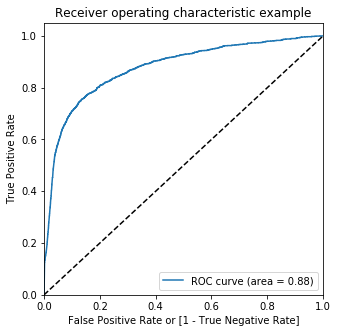

In [163]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

###  Finding Optimal Cutoff Point


In [164]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.058639,39186,0,1,0,0,0,0,0,0,0,0,0
1,0,0.004667,39833,0,1,0,0,0,0,0,0,0,0,0
2,0,0.054179,38778,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000001,43026,0,1,0,0,0,0,0,0,0,0,0
4,0,0.001513,12271,0,1,0,0,0,0,0,0,0,0,0


In [165]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.808619  0.798936  0.809467
0.2   0.2  0.900905  0.666470  0.921436
0.3   0.3  0.926905  0.542283  0.960588
0.4   0.4  0.925905  0.255470  0.984619
0.5   0.5  0.925762  0.182732  0.990833
0.6   0.6  0.927143  0.147842  0.995391
0.7   0.7  0.921000  0.019515  0.999948
0.8   0.8  0.919524  0.000591  1.000000
0.9   0.9  0.919476  0.000000  1.000000


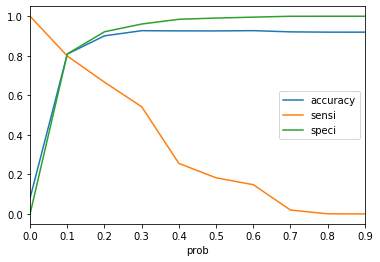

In [166]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [167]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.058639,39186,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.004667,39833,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.054179,38778,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000001,43026,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.001513,12271,0,1,0,0,0,0,0,0,0,0,0,0


In [168]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8086190476190476

In [169]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[15630,  3679],
       [  340,  1351]], dtype=int64)

In [170]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [171]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7989355410999409

In [172]:
# Let us calculate specificity
TN / float(TN+FP)

0.8094670878864778

In [173]:
# Calculate false postive rate - predicting Churn when customer does not have Churned
print(FP/ float(TN+FP))

0.1905329121135222


In [174]:
# Positive predictive value 
print (TP / float(TP+FP))

0.26858846918489065


In [175]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9787100814026299


## Precision and Recall

In [176]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion

array([[15630,  3679],
       [  340,  1351]], dtype=int64)

In [177]:
##### Precision
TP / TP + FP

3680.0

In [178]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.26858846918489065

In [179]:
##### Recall
TP / TP + FN

341.0

In [180]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7989355410999409

### Precision and recall tradeoff


In [181]:
from sklearn.metrics import precision_recall_curve

In [182]:
pd.set_option('display.max_rows', False)


In [183]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0        0
 1        0
 2        0
 3        0
 4        0
 5        0
 6        0
 7        0
 8        0
 9        0
 10       0
         ..
 20989    0
 20990    0
 20991    0
 20992    0
 20993    0
 20994    0
 20995    0
 20996    0
 20997    0
 20998    0
 20999    0
 Name: Churn, Length: 21000, dtype: int64, 0        0
 1        0
 2        0
 3        0
 4        0
 5        0
 6        0
 7        0
 8        0
 9        0
 10       0
         ..
 20989    0
 20990    0
 20991    0
 20992    0
 20993    0
 20994    0
 20995    0
 20996    0
 20997    0
 20998    0
 20999    0
 Name: predicted, Length: 21000, dtype: int64)

In [184]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

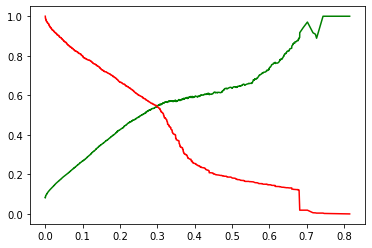

In [185]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [186]:
# we need high sensitivity or recall , which is correct at 0.1 prob, though precision is less which we can do for this case study

In [187]:
#fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

#### Making predictions on the test set

In [191]:
X_test = X_test[X_train.columns]
X_test.head()

,loc_og_t2f_mou_8,spl_og_mou_8,std_ic_t2m_mou_8,total_ic_mou_8,isd_ic_mou_8,total_rech_num_8,date_of_last_rech_8,last_day_rch_amt_8,date_of_last_rech_data_8,av_rech_amt_data_8,arpu_2g_8,sachet_3g_6
20296,-0.216853,-0.172815,-0.229044,-0.630710,-0.159451,-0.643976,-2.364980,0.340926,-0.908515,-0.623153,-0.381471,-0.211037
8279,-0.304296,-0.190888,-0.263402,-0.702645,-0.159451,-0.320548,-0.024960,-0.624269,0.013576,-0.241913,-0.193911,-0.211037
72269,-0.170285,0.223796,-0.004493,0.492325,-0.155911,-0.212739,0.287042,0.247088,-0.908515,-0.623153,-0.381471,1.841191
65602,-0.304296,-0.327945,-0.228383,-0.251648,-0.159451,1.404402,0.755046,-0.423186,-0.908515,-0.623153,-0.381471,-0.211037
42758,-0.304296,-0.327945,-0.263402,-0.680787,-0.001104,-0.859595,-0.180962,-0.624269,-0.908515,-0.623153,-0.381471,-0.211037


In [192]:
X_test_sm = sm.add_constant(X_test)

In [193]:
y_test_pred = res.predict(X_test_sm)

In [194]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame( )

In [195]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [196]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [197]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [198]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [199]:
y_pred_final.head()

,Churn,CustID,0
0,1,20296,0.299321
1,1,8279,0.143408
2,0,72269,0.008764
3,0,65602,0.037415
4,1,42758,0.330174


In [200]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [201]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','Churn','Churn_Prob']]

In [202]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,20296,1,0.299321
1,8279,1,0.143408
2,72269,0,0.008764
3,65602,0,0.037415
4,42758,1,0.330174


In [203]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [204]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,20296,1,0.299321,1
1,8279,1,0.143408,1
2,72269,0,0.008764,0
3,65602,0,0.037415,0
4,42758,1,0.330174,1


In [205]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.809910009998889

In [206]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[6682, 1569],
       [ 142,  608]], dtype=int64)

In [207]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [208]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8106666666666666

In [209]:
# Let us calculate specificity
TN / float(TN+FP)

0.809841231365895